# Desafío 1

## Exploratory Data Analysis - La Caja

El objetivo de este análisis es comprender la relación entre las pólizas de seguro y los vehículos asegurados. Al negocio le interesa especialmente conocer su cartera de clientes y conocer cuáles son los clientes que hicieron un reclamo de siniestro.

In [518]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Insurance Data

Columnas: 
- INSR_BEGIN – Fecha de inicio de la póliza.
- INSR_END – Fecha de fin de la póliza.
- CUSTOMER_SENIORITY – Antigüedad del cliente en la empresa.
- SEX – Genero del cliente.
- INSR_TYPE – Tipo de póliza
- INSURED_VALUE – Suma del valor asegurado.
- PREMIUM – Cuota a pagar por la póliza.
- VEHICLE_ID – Id del vehículo asegurado.
- USAGE – Uso del vehículo asegurado.
- CLAIM_PAID – Pago realizado al cliente por un reclamo de siniestro. Si es nulo significa que no hubo reclamo.

In [519]:
# Cargar dataset desde archivo csv
df_insurance_data = pd.read_csv("insurance_data.csv")

In [520]:
# Primeras filas de insurance
df_insurance_data.head()

,POLICY_ID,INSR_BEGIN,INSR_END,CUSTOMER_SENIORITY,SEX,INSR_TYPE,INSURED_VALUE,PREMIUM,VEHICLE_ID,USAGE,CLAIM_PAID
0,300226657,01-JUL-14,30-JUN-15,16,Female,1201,17000.0,163.20,5000546971,Private,NaN
1,300231460,01-JUL-14,30-JUN-15,1,Female,1202,2600000.0,45761.90,5000578640,Own service,30981.20
2,300046799,01-JUL-14,30-JUN-15,7,Female,1201,80000.0,907.20,5000059976,Private,NaN
3,300046807,01-JUL-14,30-JUN-15,0,Female,1201,225000.0,3690.55,5000059986,Private,NaN
4,300046812,01-JUL-14,30-JUN-15,1,Female,1202,950000.0,10441.89,5000059996,Own Goods,2167218.69


In [521]:
df_insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406448 entries, 0 to 406447
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   POLICY_ID           406448 non-null  int64  
 1   INSR_BEGIN          406448 non-null  object 
 2   INSR_END            406448 non-null  object 
 3   CUSTOMER_SENIORITY  406448 non-null  int64  
 4   SEX                 406448 non-null  object 
 5   INSR_TYPE           406448 non-null  int64  
 6   INSURED_VALUE       406448 non-null  float64
 7   PREMIUM             406439 non-null  float64
 8   VEHICLE_ID          406448 non-null  int64  
 9   USAGE               406448 non-null  object 
 10  CLAIM_PAID          33040 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 34.1+ MB


Principales conclusiones:
- INSR_TYPE: teniendo en cuenta que representa el tipo de póliza, debería tener formato object, ya que si bien es un valor numérico hace referencia a una variable categórica. 
- INSR_BEGIN y INSR_END: Tienen vlor object pero representan fechas, por lo tanto conviene pasarla a date. 

In [522]:
# Convertir a object la variable INSR_TYPE
df_insurance_data['INSR_TYPE'] = df_insurance_data['INSR_TYPE'].astype('object')

In [523]:
# Convertir fechas a datetime
df_insurance_data["INSR_BEGIN"] = pd.to_datetime(df_insurance_data["INSR_BEGIN"], errors="coerce")
df_insurance_data["INSR_END"] = pd.to_datetime(df_insurance_data["INSR_END"], errors="coerce")

C:\Users\solange.moreyra\AppData\Local\Temp\ipykernel_6896\2285932962.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_insurance_data["INSR_BEGIN"] = pd.to_datetime(df_insurance_data["INSR_BEGIN"], errors="coerce")
C:\Users\solange.moreyra\AppData\Local\Temp\ipykernel_6896\2285932962.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_insurance_data["INSR_END"] = pd.to_datetime(df_insurance_data["INSR_END"], errors="coerce")


#### Valores nulos

In [524]:
null_values = df_insurance_data.isna().sum()

print("Cantidad de valores nulos (NaN) por columna:")
print(null_values)

Cantidad de valores nulos (NaN) por columna:
POLICY_ID                  0
INSR_BEGIN                 0
INSR_END                   0
CUSTOMER_SENIORITY         0
SEX                        0
INSR_TYPE                  0
INSURED_VALUE              0
PREMIUM                    9
VEHICLE_ID                 0
USAGE                      0
CLAIM_PAID            373408
dtype: int64


Dado que no hay valores nulos en VEHICLE_ID todos los registros podran ser unidos con vehicle_data. 

#### Valores duplicados

In [525]:
# Contar filas completamente duplicadas en insurance_data
duplicated_rows = df_insurance_data.duplicated(subset=['POLICY_ID']).sum()
print(f"Cantidad de filas duplicadas en insurance_data: {duplicated_rows}")

Cantidad de filas duplicadas en insurance_data: 0


No hay registros duplicados. 

In [526]:
# Verificar si hay registros duplicados con otro POLICY_ID. 
duplicated_rows_2 = df_insurance_data.duplicated(subset=df_insurance_data.columns.difference(['POLICY_ID'])).sum()
print(f"Cantidad de filas duplicadas sin tener en cuenta el POLICY_ID: {duplicated_rows_2}")

Cantidad de filas duplicadas sin tener en cuenta el POLICY_ID: 21


Hay 21 polizas duplicadas. Esto puede significar que hubieron errores en la base de datos al procesar el registro o hay un problema de integración de datos (si vienen por ejemplo de diferentes sistemas). Para confirmar esto se puede verificar la secuencia de los POLICY_ID, si siguen una secuencia se puede tratar de una duplicación en el registro. 

#### Detectar valores atípicos

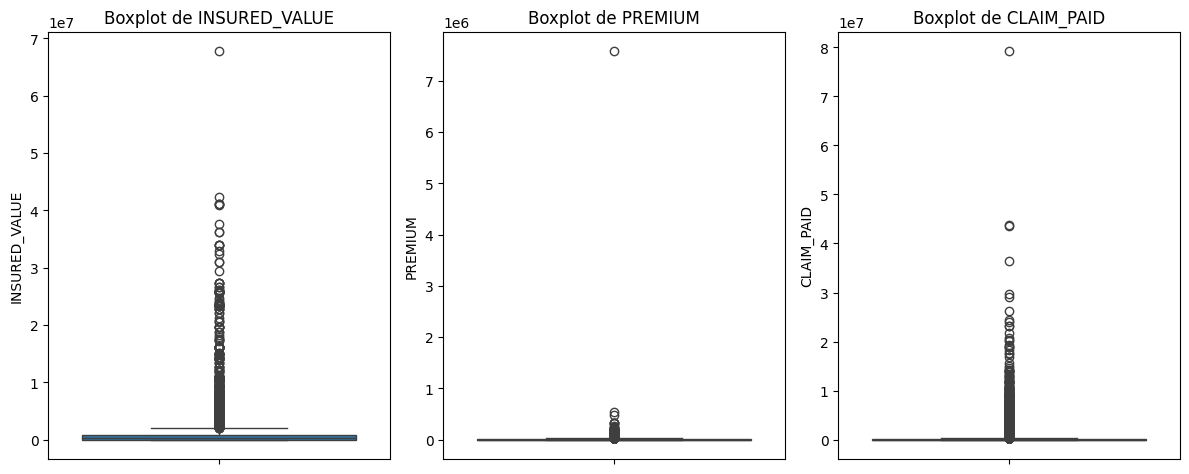

In [527]:
numeric_cols_insurance = ["INSURED_VALUE", "PREMIUM", "CLAIM_PAID"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_cols_insurance):
    plt.subplot(1, len(numeric_cols_insurance), i+1)
    sns.boxplot(y=df_insurance_data[col])
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

Conclusiones principales:
- INSURED_VALUE: Se observan valores extremadamente altos que llegan hasta ~67 millones.
- PREMIUM: Existen primas extremadamente altas, con un valor máximo de ~7.5 millones.
- CLAIM_PAID: Hay reclamos pagados muy elevados, con un máximo cercano a 80 millones.
- Las tres presentan valores atípicos altos, pueden corresponder a vehículos de lujo o coberturas comerciales de alto valor asegurado, o errores en los datos. 

### Vehicle Info

Columnas:
- VEHICLE_ID – Id del vehículo.
- PROD_YEAR – Año de fabricación.
- SEATS_NUM – Cantidad de asientos.
- CARRYING_CAPACITY – Capacidad de carga.
- TYPE_VEHICLE – Tipo de vehículo.
- CCM_TON – Potencia del motor.
- MAKE – Marca del vehículo.

In [528]:
# Cargar dataset desde archivo csv
df_vehicle_info = pd.read_csv("vehicle_info.csv")

In [529]:
# Visualizar las primeras filas de vehicle
df_vehicle_info.head()

,VEHICLE_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE
0,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN
1,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA
2,5000030358,2012.0,0.0,220.0,Truck,12880.0,IVECO
3,5000031259,1999.0,11.0,0.0,Bus,2985.0,TOYOTA
4,5000031274,2000.0,12.0,12.0,Bus,2985.0,TOYOTA


In [530]:
df_vehicle_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223094 entries, 0 to 223093
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   VEHICLE_ID         223094 non-null  int64  
 1   PROD_YEAR          223094 non-null  float64
 2   SEATS_NUM          223075 non-null  float64
 3   CARRYING_CAPACITY  173985 non-null  float64
 4   TYPE_VEHICLE       223094 non-null  object 
 5   CCM_TON            223094 non-null  float64
 6   MAKE               223092 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 11.9+ MB


El año PROD_YEAR debería ser un valor entero.

In [531]:
# Verificar si hay valores decimales en PROD_YEAR
print(df_vehicle_info[df_vehicle_info["PROD_YEAR"] % 1 != 0]["PROD_YEAR"])

Series([], Name: PROD_YEAR, dtype: float64)


No hay valores con decimales. 

In [532]:
# Convertir las variables a entero
df_vehicle_info["PROD_YEAR"] = df_vehicle_info["PROD_YEAR"].astype(int)
print(df_vehicle_info["PROD_YEAR"].dtype)

int32


#### Valores nulos

In [533]:
null_values = df_vehicle_info.isna().sum()

print("Cantidad de valores nulos (NaN) por columna:")
print(null_values)

Cantidad de valores nulos (NaN) por columna:
VEHICLE_ID               0
PROD_YEAR                0
SEATS_NUM               19
CARRYING_CAPACITY    49109
TYPE_VEHICLE             0
CCM_TON                  0
MAKE                     2
dtype: int64


No hay valores faltantes de VEHICLE_ID en vehicle_info, por lo que no quedarán registros excluidos al combinar ambas tablas (si es que todos los vehicle_id en vehicle_info existen en insurance_data).

#### Valores duplicados

In [534]:
duplicated_rows = df_vehicle_info.duplicated(subset=["VEHICLE_ID"]).sum()
print(f"Cantidad de filas duplicadas en vehicle_info: {duplicated_rows}")

Cantidad de filas duplicadas en vehicle_info: 0


No hay registros duplicados.

In [535]:
# Verificar si hay registros duplicados con otro VEHICLE_ID. 
duplicated_rows_2 = df_vehicle_info.duplicated(subset=df_vehicle_info.columns.difference(['VEHICLE_ID'])).sum()
print(f"Cantidad de filas duplicadas sin tener en cuenta el VEHICLE_ID: {duplicated_rows_2}")

Cantidad de filas duplicadas sin tener en cuenta el VEHICLE_ID: 170488


#### Detectar valores atípicos

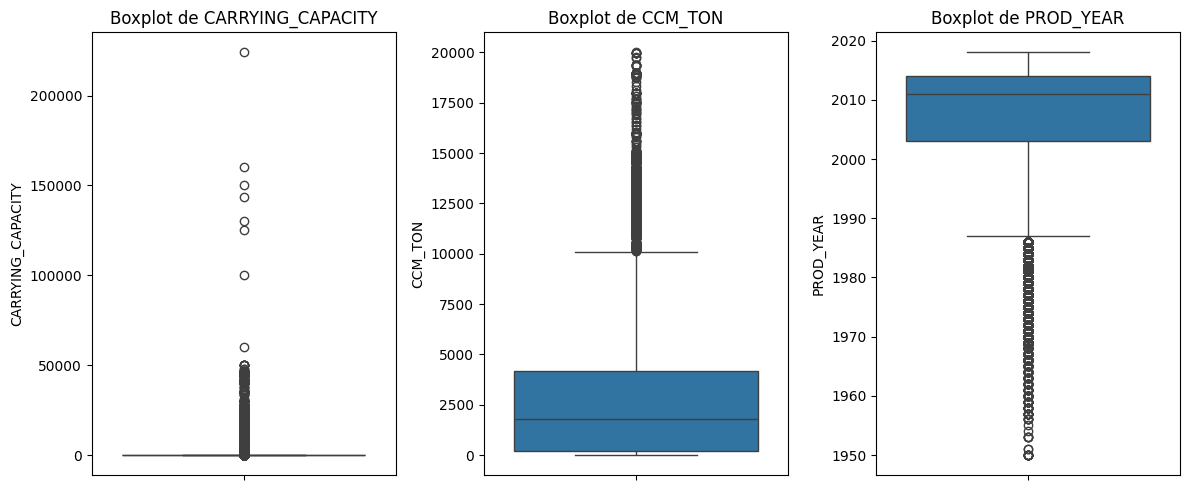

In [536]:
numeric_cols_vehicle = ["CARRYING_CAPACITY", "CCM_TON", "PROD_YEAR"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_cols_vehicle):
    plt.subplot(1, len(numeric_cols_vehicle), i+1)
    sns.boxplot(y=df_vehicle_info[col])
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

Conclusiones principales:
- CARRYING_CAPACITY y CCM_TON: Tienen valores extremadamente altos que podrían ser errores o vehículos industriales.
- PROD_YEAR: La presencia de vehículos muy antiguos podría indicar autos clásicos o datos incorrectos.

### Unido

In [537]:
# Verificar si VEHICLE_ID es único en cada dataset
print("Unicidad de VEHICLE_ID en insurance_data:", df_insurance_data["VEHICLE_ID"].is_unique)
print("Unicidad de VEHICLE_ID en vehicle_info:", df_vehicle_info["VEHICLE_ID"].is_unique)

# Verificar si hay valores duplicados en VEHICLE_ID
print("Cantidad de duplicados en insurance_data:", df_insurance_data["VEHICLE_ID"].duplicated().sum())
print("Cantidad de duplicados en vehicle_info:", df_vehicle_info["VEHICLE_ID"].duplicated().sum())

# Verificar si todos los VEHICLE_ID de insurance_data están en vehicle_info
print("Todos los VEHICLE_ID de insurance_data están en vehicle_info:", 
      df_insurance_data["VEHICLE_ID"].isin(df_vehicle_info["VEHICLE_ID"]).all())

# Verificar si hay VEHICLE_ID en vehicle_info que no están en insurance_data
missing_vehicles_in_insurance = df_vehicle_info[~df_vehicle_info["VEHICLE_ID"].isin(df_insurance_data["VEHICLE_ID"])]
print("Cantidad de VEHICLE_ID en vehicle_info que no están en insurance_data:", missing_vehicles_in_insurance.shape[0])

Unicidad de VEHICLE_ID en insurance_data: False
Unicidad de VEHICLE_ID en vehicle_info: True
Cantidad de duplicados en insurance_data: 213396
Cantidad de duplicados en vehicle_info: 0
Todos los VEHICLE_ID de insurance_data están en vehicle_info: True
Cantidad de VEHICLE_ID en vehicle_info que no están en insurance_data: 30042


Principales conclusiones:
- En insurance_data puede haber múltiples registros para un mismo vehículo (posiblemente por varias pólizas asociados a un mismo vehículo) y  cuando se combinen no se va a perder información porque todos los VEHICLE_ID de insurance_data se encuentran en vehicle_info.
- Hay VEHICLE_ID de vehicle_info que no se encuentran en insurance_data, esto puede ser porque posiblemente son vehículos sin póliza (puede suceder también que esten faltando datos).

In [538]:
# Merge por VEHICLE_ID
merged_df = df_insurance_data.merge(df_vehicle_info, on="VEHICLE_ID", how="left")

#### Valores nulos

In [539]:
null_values = merged_df.isna().sum()

print("Cantidad de valores nulos (NaN) por columna:")
print(null_values)

Cantidad de valores nulos (NaN) por columna:
POLICY_ID                  0
INSR_BEGIN                 0
INSR_END                   0
CUSTOMER_SENIORITY         0
SEX                        0
INSR_TYPE                  0
INSURED_VALUE              0
PREMIUM                    9
VEHICLE_ID                 0
USAGE                      0
CLAIM_PAID            373408
PROD_YEAR                  0
SEATS_NUM                 27
CARRYING_CAPACITY      94352
TYPE_VEHICLE               0
CCM_TON                    0
MAKE                       3
dtype: int64


Conclusiones principales:
- Si los nulos representan un valor pequeño de datos se los puede eliminar. 
- Para CLAIM_PAID se los puede reemplazar con 0 porque los nulls en este caso representa la ausencia de reclamos, no son datos faltantes.
- Para PREMIUM, SEATS_NUM y CARRYING_CAPACITY, si no se desea eliminarlos, se los puede reempzar por la mediana, la media o algún valor representtivo según criterio del negocio. 
- Para MAKE se los puede reemplazar por el valor más frecuente al ser una variable categórica. O analizar las columnas de CARRYIN_CAPACITY, TYPE_VEHICLE, CCM_TON para ver cuál tiene mayor similitud en datos y reemplazarlo por ese valor. 

In [540]:
# Reemplazar CLAIM_PAID nulo con 0 (sin reclamo)
merged_df["CLAIM_PAID"].fillna(0, inplace=True)

C:\Users\solange.moreyra\AppData\Local\Temp\ipykernel_6896\2008986120.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df["CLAIM_PAID"].fillna(0, inplace=True)


#### Valores duplicados

In [541]:
duplicated_rows = merged_df.duplicated().sum()
print(f"Cantidad de filas duplicadas en vehicle_info: {duplicated_rows}")

Cantidad de filas duplicadas en vehicle_info: 0


No hay registros enteros duplicados.

#### Análisis de outliers

In [542]:
merged_df.describe().transpose().applymap(lambda x: f"{x:,.2f}")

C:\Users\solange.moreyra\AppData\Local\Temp\ipykernel_6896\2932461572.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df.describe().transpose().applymap(lambda x: f"{x:,.2f}")


,count,mean,min,25%,50%,75%,max,std
POLICY_ID,"406,448.00","300,233,073.16","300,000,001.00","300,114,060.75","300,232,199.50","300,348,763.50","300,508,115.00","137,376.78"
INSR_BEGIN,"406,448.00",",.2f",",.2f",",.2f",",.2f",",.2f",",.2f",nan
INSR_END,"406,448.00",",.2f",",.2f",",.2f",",.2f",",.2f",",.2f",nan
CUSTOMER_SENIORITY,"406,448.00",4.88,0.00,1.00,2.00,7.00,63.00,6.39
INSURED_VALUE,"406,448.00","576,634.77",0.00,0.00,"230,000.00","850,000.00","67,824,388.47","938,905.60"
PREMIUM,"406,439.00","8,071.21",0.00,737.15,"3,837.93","10,849.75","7,581,230.43","16,333.94"
VEHICLE_ID,"406,448.00","5,000,525,165.73","5,000,017,900.00","5,000,194,525.50","5,000,566,664.00","5,000,799,391.00","5,001,275,809.00","331,339.69"
CLAIM_PAID,"406,448.00","19,990.81",0.00,0.00,0.00,0.00,"79,247,141.10","321,475.46"
PROD_YEAR,"406,448.00","2,005.86","1,950.00","2,001.00","2,009.00","2,013.00","2,018.00",9.77
SEATS_NUM,"406,421.00",6.25,0.00,1.00,3.00,4.00,198.00,14.07


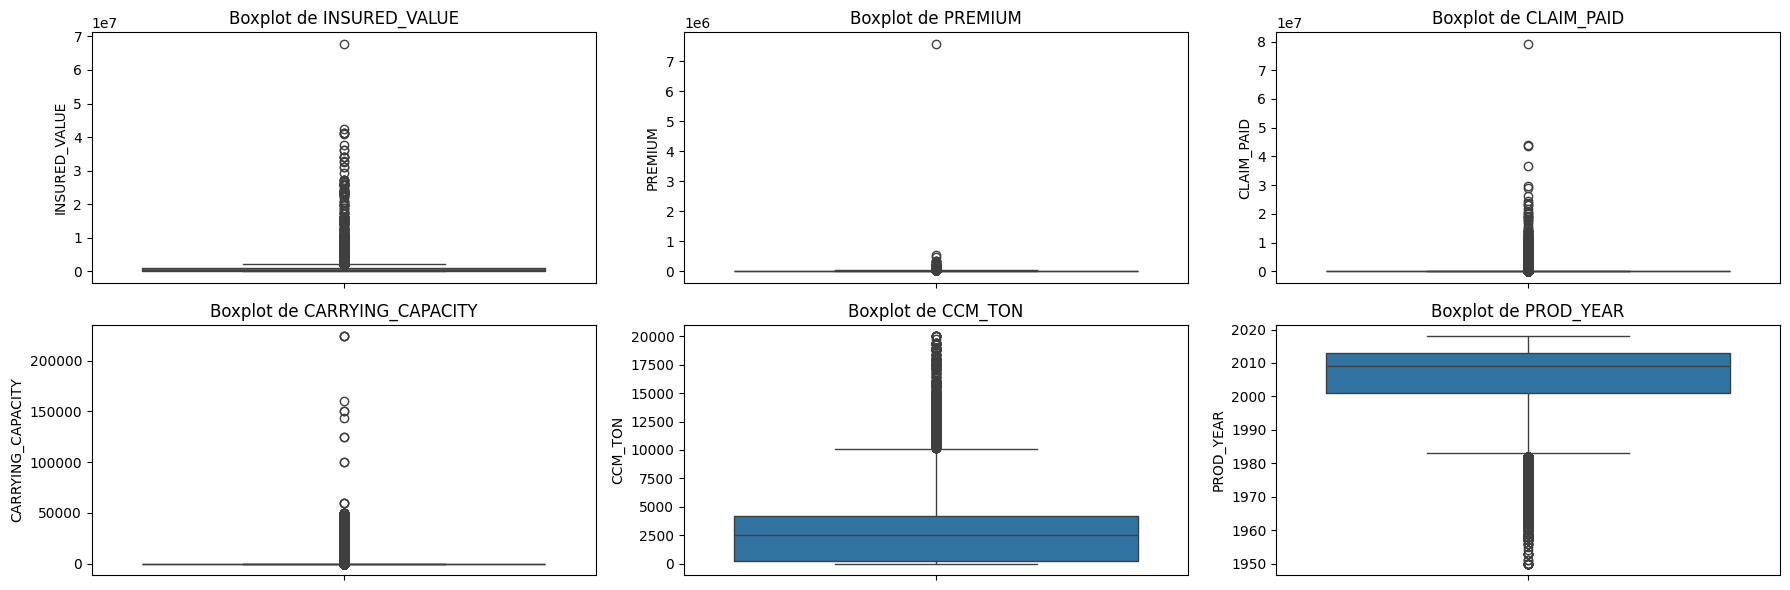

In [543]:
numeric_cols_merged = ["INSURED_VALUE", "PREMIUM", "CLAIM_PAID", "CARRYING_CAPACITY", "CCM_TON", "PROD_YEAR"]

plt.figure(figsize=(18, 6))
for i, col in enumerate(numeric_cols_merged):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=merged_df[col])
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

Principales conclusiones:
- POLICY_ID: es único y es un identificador.

- CUSTOMER_SENIORITY: La antiguedad promedio es de 4.88 años. El 25% de los clientes tiene 1 año o menos de antiguedad, lo que puede significar que hay una gran cantidad de clientes nuevos. Hay clientes con hasta 63 años de antiguedad, lo que puede indicar una base leal de clientes a largo plazo. 

- INSURED_VALUE: Es un valor importante para deteminar el riesgo que asume el negocio, dado que es el monto máximo que la aseguradora pagará en caso de una reclamación. El 25% de las pólizas tienen un valor asegurdo de 0, lo que puede significar que hay registros incompletos o pólizas con condiciones especiales. El valor máximo asegurado es de 67.8 millones, lo que puede indicar la presencia de vehículos de lujo. 
Se puede comprar con el monto de reclamo par ver si hay sobreaseguramiento. 

- PREMIUM: Algunas pólizas tienen una prima = 0, lo que podría deberse a errores o pólizas sin costo directo para el cliente. La prima máxima es de 7.58 millones, lo que puede significar la existencia de pólizas de alto valor.
Se puede analizar su relación con INSURED_VALUE; y compararlas entre las pólizas con y sin reclamos.

- VEHICLE_ID: Es un identificador.

- CLAIM_PAID: 33,040 pólizas tuvieron un reclamo, solo el 8.1%, lo que puede indicar que los siniestros son poco frecuentes.

- PROD_YEAR: No se observan años irreales, es decir el mínimo tiene sentido (no es negativo y empeiza a partir del 1950) y no hay máximos mayores al año actual. La mayoría de los vehículos son relativamente recientes (mediana en 2011, el 75% fabricado despupes del 2003). Hay vehículos muy antiguos (desde 1950), lo que podría significar que hay algunos registros históricos o vehículos clásicos y/o de colección aún en circulación.

- SEATS_NUM: La mayoría de los vehículos tienen entre 3 y 4 asientos, lo que es típico de autos particulares. Hay valores extremadamente altos (198 asientos), lo que indica que hay buses o transportes colectivos en el dataset. La presencia de valores en 0 podría representar errores en los datos o vehículos sin asientos (trailers, camiones de carga). 
Se debería analizar si dichos valores de número de asientos es coherente con el tipo de vehículo (TYPE_VEHICLE).

- CARRYING_CAPACITY: El valor máximo de 224,000 toneladas es un valor grande y parece poco realista, lo que sugiere que pueden haber errores en los datos. 

- CCM_TON: Los valores máximos son muy altos (20,000), lo que sugiere que hay vehículos industriales o errores de registro. La mayoría de los vehículos tienen menos de 4,164 ccm, lo que es típico de autos y camionetas. 
Los valores en 0 podrían ser errores, vehículos eléctricos sin cilindrada; y también se puede analizar si esto afecta la probabilidad de reclamos.

In [544]:
merged_df.describe(include=['O'])

,SEX,INSR_TYPE,USAGE,TYPE_VEHICLE,MAKE
count,406448,406448,406448,406448,406445
unique,2,3,14,11,688
top,Female,1202,Own Goods,Motor-cycle,TOYOTA
freq,213946,306515,114697,78190,135057


In [545]:
# Mostrar los valores únicos de las columnas 'SEX', 'USAGE', 'INSR_TYPE', 'TYPE_VEHICLE', 'MAKE'
print("Valores únicos de la columna 'SEX':")
print(merged_df['SEX'].unique())
print(f"Cantidad de valores únicos: {len(merged_df['SEX'].unique())}")

print("\nValores únicos de la columna 'INSR_TYPE':")
print(merged_df['INSR_TYPE'].unique())
print(f"Cantidad de valores únicos: {len(merged_df['INSR_TYPE'].unique())}")

print("\nValores únicos de la columna 'USAGE':")
print(merged_df['USAGE'].unique())
print(f"Cantidad de valores únicos: {len(merged_df['USAGE'].unique())}")

print("\nValores únicos de la columna 'TYPE_VEHICLE':")
print(merged_df['TYPE_VEHICLE'].unique())
print(f"Cantidad de valores únicos: {len(merged_df['TYPE_VEHICLE'].unique())}")

print("\nValores únicos de la columna 'MAKE':")
print(merged_df['MAKE'].unique())
print(f"Cantidad de valores únicos: {len(merged_df['MAKE'].unique())}")

Valores únicos de la columna 'SEX':
['Female' 'Male']
Cantidad de valores únicos: 2

Valores únicos de la columna 'INSR_TYPE':
[1201 1202 1204]
Cantidad de valores únicos: 3

Valores únicos de la columna 'USAGE':
['Private' 'Own service' 'Own Goods' 'Agricultural Own Farm'
 'Special Construction' 'Others' 'Fare Paying Passengers'
 'Agricultural Any Farm' 'General Cartage' 'Fire fighting' 'Taxi'
 'Car Hires' 'Ambulance' 'Learnes']
Cantidad de valores únicos: 14

Valores únicos de la columna 'TYPE_VEHICLE':
['Motor-cycle' 'Bus' 'Automobile' 'Pick-up' 'Station Wagones' 'Truck'
 'Tanker' 'Tractor' 'Trailers and semitrailers' 'Special construction'
 'Trade plates']
Cantidad de valores únicos: 11

Valores únicos de la columna 'MAKE':
['SUZUKI' 'BISHOFTU' 'TOYOTA' 'MITSUBISHI' 'ISUZU' 'FIAT' 'ATOZ' 'IVECO'
 'MERCEDES' 'JOHN DEER' 'LIFAN' 'FORD' 'CALABRESE' 'NEW HOLLAND'
 'INTERNATIONAL USE' 'NISSAN' 'MARU' 'MESFIN' 'CLASS' 'VERSATILE' 'MAZDA'
 'ROLFO' 'BELARUS' 'VOLKSWAGON' 'RENAULT' 'YAMAHA'

Principales conclusiones:
- SEX: Solo hay dos valores únicos (Female y Male). Las mujeres son mayoría. 
- INSR_TYPE: Presenta tres tipos de póliza, '1201', '1202' y '1204'. La póliza '1202' son mayoría. 
- USAGE: Existen 14 categorías de uso, no se observan valores repetidos o inconsistentes. La categoria más frecuente es 'Own Goods', lo que puede significar que muchos vehículos asegurados son usados para carga propia o fines comerciales. 
- TYPE_VEHICLE: No se observa valores duplicados y/o con inconsistencias respecto a lo que representa dicha variable. 
- MAKE: Teniendo en cuenta que la columna 'Make' hace referencia exclusivamente a marcas de vahículos, se pueden observar tres problemas principales:
    - Errores tipográficos y duplicados: A simple vista se puede ver que hay un "TOYOTA*" y otro "TOYOTA". También esta el mismo nombre dos veces pero con diferente tipo de letra (uno en mayúscula y otor en minúscula). También dice "MERCEDES'", "MERCEEDICE" y "MERCHEDES".
    - Valores que no son marcas: por ejemplo 'MOTOR CYCLE (TWOCYCLE)', 'ROAD-ROLLER', 'WHEEL LOADER', 'SUGERCANE TRAILER'.
    - Marcas inexstentes: por ejemplo "ZZ", "ME", "DOCC", "GAM".

Los pasos para corregir esto último podrian ser:
- Paso 1: Convertir todo a mayúscula, quitar símbolos y espacios en blanco. 
- Paso 2: Normalizar marcas conocidas, arreglar errores tipográficos. En lugar de eliminar los registros que dice 'MERCHEDES' reemplazarlo por 'MERCEDES'. Esto se puede realizar en primer lugar obteniendo las marcas de auto que existen desde una API, web scraping o bases de datos de automóviles. Cabe destacar que para este paso la lista de marcas debe coincidir en formato con la columna 'MAKE', es decir, debe estar todo en mayúcula, sin sínbolos y espacios en blanco. 
Posteriormente una vez obtenida las marcas de autos existentes, se puede usar, por ejemplo, una combinación de fuzzy matching y algoritmos de similitud de cadenas; en donde se compara cada valor de la columna MAKE con la lista de marcas correctas obtenidas anteriormente y se reemplazan los nombres similares automáticamnete si su similitud supera un cierto umbral. 
- Paso 3: A part del POLICY_ID investigar cuál es la marca real del vehículo que tiene marcas inexistentes y reemplazarlo en la base de datos para poder mejorar el registro. 

##### MAKE

In [546]:
# Paso 1
# Conventir todo a mayúscula.
merged_df['MAKE'] = merged_df['MAKE'].str.upper()

# Eliminar símbolos dejando solo letras, números y espacios
merged_df['MAKE'] = merged_df['MAKE'].str.replace(r'[^A-Z0-9 ]', '', regex=True)

# Eliminar espacios en blanco
merged_df['MAKE'] = merged_df['MAKE'].str.strip()

print(f"Cantidad de valores únicos: {len(merged_df['MAKE'].unique())}")

Cantidad de valores únicos: 676


La cantidad de valores únicos previo a esta modificación eran 689 y ahora 676. A continuación se presenta un ejemplo de posible código para modificar dicho campo.

In [547]:
# # Paso 2
# import requests
# from bs4 import BeautifulSoup

# # URL de Wikipedia con marcas de autos
# url = "https://en.wikipedia.org/wiki/List_of_car_brands"

# # Hacer la solicitud a Wikipedia
# response = requests.get(url)
# soup = BeautifulSoup(response.text, "html.parser")

# # Extraer todas las marcas (se buscan los enlaces dentro del contenido principal)
# marcas_wiki = set()
# for li in soup.find_all("li"):
#     if li.a:  # Si el elemento tiene un enlace
#         marca = li.a.text.strip()
#         if len(marca) > 1 and " " not in marca:  # Filtrar nombres muy cortos y evitar frases
#             marcas_wiki.add(marca.upper())  # Convertir a mayúsculas

# # Convertir a lista
# marcas_validas = list(marcas_wiki)
# print(marcas_validas)  # Mostramos algunas


In [548]:
# # Normalizar marcas conocidas usando fuzzy matching
# from rapidfuzz import process

# # Función para corregir marcas con fuzzy matching
# def corregir_marca(marca, marcas_validas, umbral=80):
#     # Realizamos el fuzzy matching
#     mejor_match, score, _ = process.extractOne(marca, marcas_validas)
    
#     # Si el score es mayor que el umbral, se devuelve la mejor coincidencia
#     return mejor_match if score >= umbral else marca

# # Aplicar la corrección de marcas a la columna 'MAKE'
# merged_df['MAKE'] = merged_df['MAKE'].apply(lambda x: corregir_marca(x, marcas_validas))

# print(merged_df)

In [549]:
# # Paso 3
# # Filtrar solo las marcas válidas
# merged_df = merged_df[df_vehicle_info['MAKE'].isin(marcas_validas)]

##### SEATS_NUM

Lo que quiero ver es si la cantidad de asientos fue un eror de tipeo o efectivamente es la cantidad por vehículo. Una forma lógica mediante la cual se puede evaluar si es coherente es comparandola con el tipo de vehículo. Por ejemplo un vehículos de transporte de carga suelen tener pocos asientos pero alta capacidad de carga.

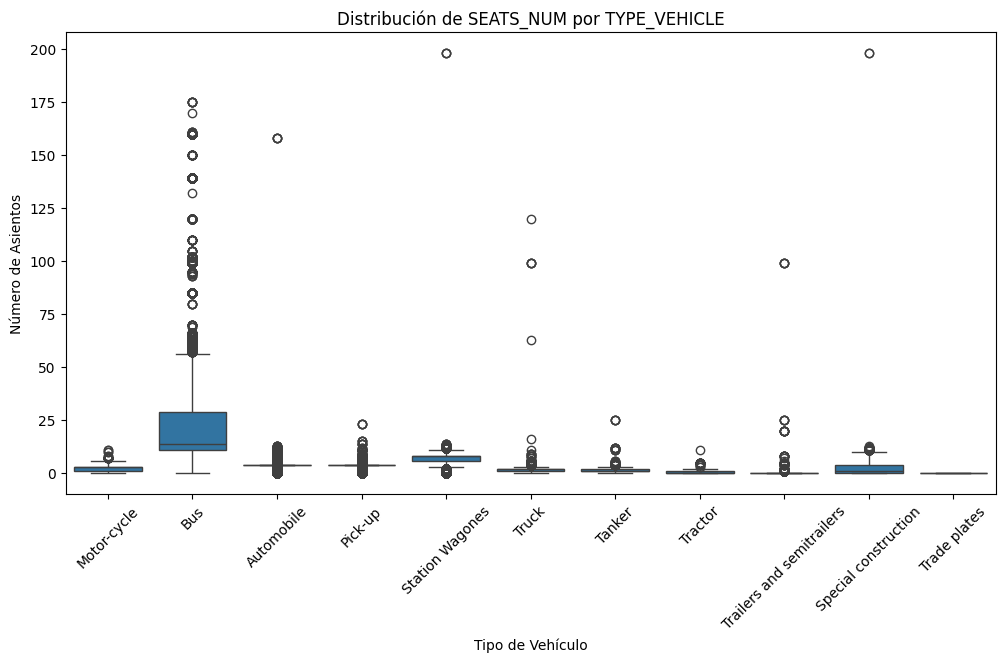

In [550]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='TYPE_VEHICLE', y='SEATS_NUM', data=merged_df, showfliers=True)  
plt.xticks(rotation=45)  
plt.xlabel("Tipo de Vehículo")
plt.ylabel("Número de Asientos")
plt.title("Distribución de SEATS_NUM por TYPE_VEHICLE")
plt.show()

A simple vista se puede observar que no es posible que una motocicleta tenga más de 2 asientos, o que un automobile tenga 160. Investigando se puede tomar como rango la siguiente cantidad de asientos por tipo de vehículo:
- Pick-up: 2 - 5 asientos
- Truck: 2 - 3 asientos
- Bus: 10 - 100+ asientos
- Trailers and semitrailers: 0 - 2 asientos
- Automobile: 2 - 7 asientos
- Motor-cycle: 1 - 2 asientos
- Station Wagons: 4 - 7 asientos
- Tractor: 1 - 2 asientos
- Special Construction: 1 - 4 asientos
- Tanker: 2 - 3 asientos
- Trade Plates: Variable (depende del vehículo registrado)

También se podría traer la API del vehículo puntual y corregirlo en la base de datos.

In [551]:
# Rango mínimo y máximo de asientos por tipo de vehículo
seat_ranges = {
    "Pick-up": (2, 5),
    "Truck": (2, 3),
    "Bus": (10, 100),
    "Trailers and semitrailers": (0, 2),
    "Automobile": (2, 7),
    "Motor-cycle": (1, 2),
    "Station Wagons": (4, 7),
    "Tractor": (1, 2),
    "Special Construction": (1, 4),
    "Tanker": (2, 3),
}

# Filtrar filas que superan el máximo de asientos por tipo de vehículo
outliers = merged_df[merged_df.apply(lambda row: row["SEATS_NUM"] > seat_ranges.get(row["TYPE_VEHICLE"], (0, float('inf')))[1], axis=1)]

# Contar la cantidad de filas por tipo de vehículo que superan el límite
outlier_count = outliers["TYPE_VEHICLE"].value_counts()

print(outlier_count)
# outliers[outliers["TYPE_VEHICLE"] == "Motor-cycle"].head()

TYPE_VEHICLE
Motor-cycle                  49900
Automobile                    2038
Bus                           1503
Pick-up                        324
Truck                          268
Tanker                          83
Trailers and semitrailers       42
Tractor                         24
Name: count, dtype: int64


Se puede suponer error en en la carga de datos. Debido a la gran cantidad de registros, para no eliminarlos, se los puede reempalzar por el valor de umbral máximo.

#### CLAIM_PAID

In [552]:
# Contar cuántos registros tienen 'CLAIM_PAID' > 0 (Claim) y cuántos son igual a 0 (No Claim)
claim_count = merged_df[merged_df['CLAIM_PAID'] > 0].shape[0]  # Pólizas con reclamo
no_claim_count = merged_df['CLAIM_PAID'].shape[0] - claim_count  # Pólizas sin reclamo
imbalance_ratio = no_claim_count / claim_count  # La mayority class es la de 'No Claim'

# Calcular el porcentaje de reclamos sobre el total
total_count = merged_df['CLAIM_PAID'].shape[0]  # Total de pólizas
claim_percentage = (claim_count / total_count) * 100  # Porcentaje de reclamos

print(f"Cantidad de pólizas con reclamo (Claim): {claim_count}")
print(f"Cantidad de pólizas sin reclamo (No Claim): {no_claim_count}")
print(f"Ratio de desbalance: {imbalance_ratio:.2f}")
print(f"Porcentaje de reclamos sobre el total: {claim_percentage:.2f}%")

Cantidad de pólizas con reclamo (Claim): 33005
Cantidad de pólizas sin reclamo (No Claim): 373443
Ratio de desbalance: 11.31
Porcentaje de reclamos sobre el total: 8.12%


En primer lugar, es importante tener en cuenta que el dataset se encuentra desbalanceado, esta característica es importante para el desafío 2. El 8.12% de las pólizas presenta reclamos.

#### Correlación

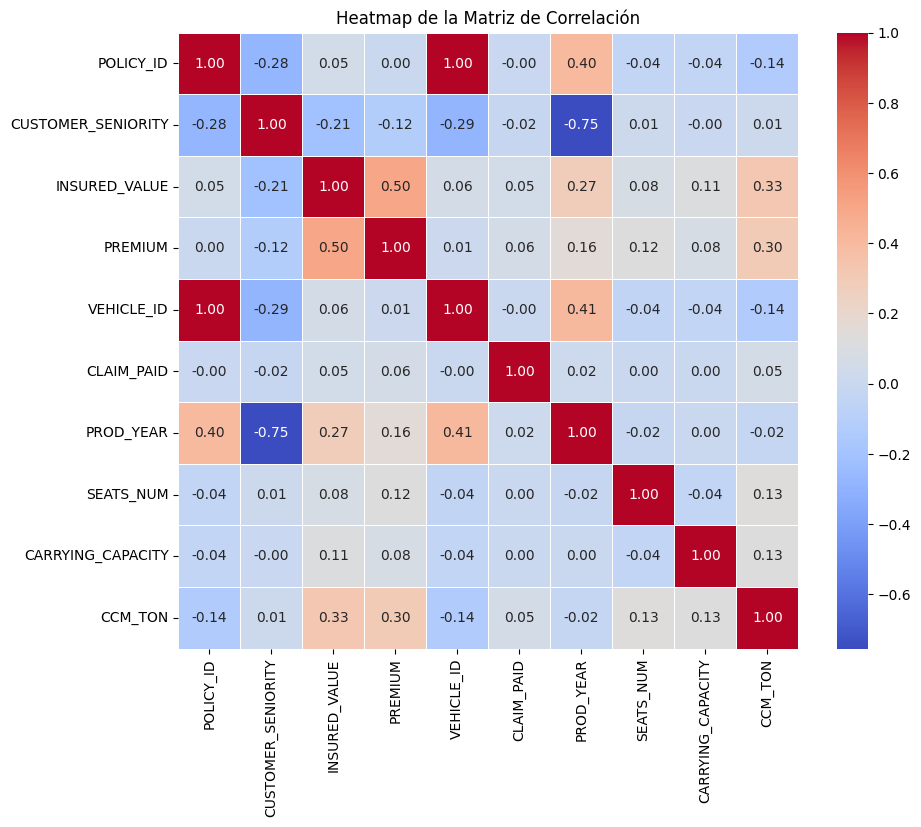

In [553]:
# Calcular la matriz de correlación solo con variables numéricas
correlation_matrix = merged_df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()

# Calcular la matriz de correlación
correlation_matrix = merged_df.select_dtypes(include=['number']).corr()

# Mostrar la matriz de correlación
# print(correlation_matrix)

Principales conclusiones:
- Hay una fuerte correlación entre CUSTOMER_SENIORITY y PROD_YEAR. Esto puede suceder porque los clientes con mayor antiguedad tienden a poseer vehículos más antiguos.
- INSURED_VALUE y PREMIUM tienen una correlación de 0.50.
- CCM_TON y INSURED_VALUE tienen 0.33, lo que indica que motores más grandes tienden a tener valores asegurados más altos.
- CLAIM_PAID tiene una correlación muy baja con todas las variables, lo que sugiere que los reclamos no dependen directamente de una única variable (por eso es coherente la realización del 'Desafío 2' porque al no haber una relación "directa" con alguna variable es más complicado determinar cuándo hay o no reclamos).

##### CUSTOMER_SENIORITY

In [554]:
# Contar total de clientes por cada nivel de antigüedad
total_clients_by_seniority = merged_df["CUSTOMER_SENIORITY"].value_counts().sort_index()
print(total_clients_by_seniority)

CUSTOMER_SENIORITY
0     93902
1     68414
2     45419
3     33056
4     25190
      ...  
56        3
57        1
58        2
59        4
63        1
Name: count, Length: 61, dtype: int64


Se podría considerar como outlier los últimos o incluso agruparlos en una categoría que sea por ejemplo "Altos Customer Seniority". Para quellos valores superiores al IQR 75% que es 7. Par este caso se los mantendrá inalterados.

Principales conclusiones:
- La empresa puede tener una gran base de clientes nuevos debido a la gran cantidad de entradas para clientes con antiguedades de 0-3 años.
- La caída en la cantidad de registros para antiguedades mayores sugiere una posible baja retención de clientes a largo plazo. 

Se recomienda investigar si los clientes dejan la empresa debido a la competencia, precios o problemas con los servicios ofreidos. También monitorear esos valores de antiguedad para ver si los clientes dejan de renovar las pólizas o abandonan la empresa después de cierto tiempo. Desarrollar estrategias de fidelización para asegurar que los clientes permanezcan por más tiempo. 

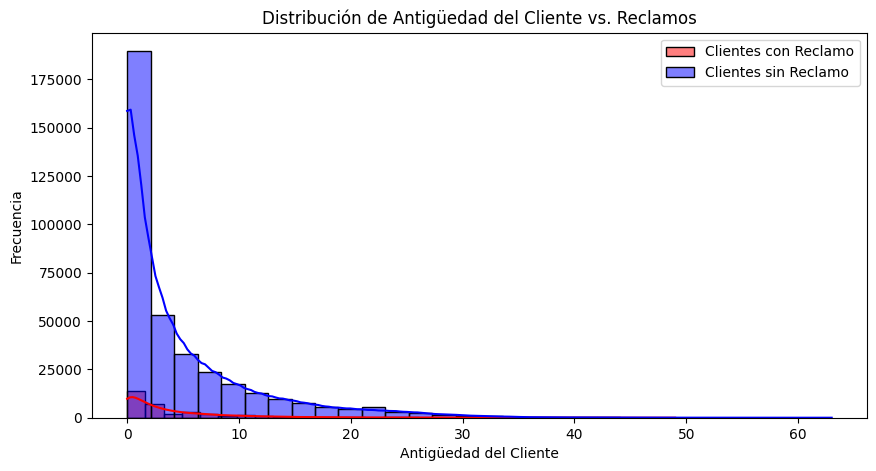

In [555]:
# Relación entre CUSTOMER_SENIORITY y la probabilidad de hacer un reclamo
plt.figure(figsize=(10, 5))
sns.histplot(merged_df[merged_df["CLAIM_PAID"] != 0]["CUSTOMER_SENIORITY"], bins=30, kde=True, color="red", label="Clientes con Reclamo")
sns.histplot(merged_df[merged_df["CLAIM_PAID"] == 0]["CUSTOMER_SENIORITY"], bins=30, kde=True, color="blue", label="Clientes sin Reclamo")
plt.legend()
plt.title("Distribución de Antigüedad del Cliente vs. Reclamos")
plt.xlabel("Antigüedad del Cliente")
plt.ylabel("Frecuencia")
plt.show()

Es importante analizar también la proporción, no solo la cantidad, para no caer en el posible error de que a menor customer_seniority mayor probabildiad de reclamo debido a una mayor cantidad de registros para esos valores. 

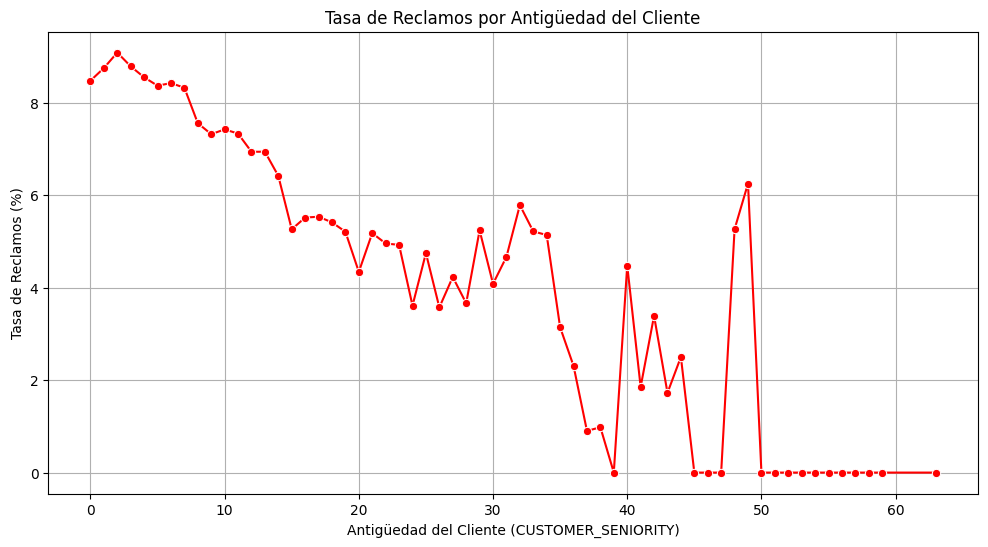

In [556]:
# Contar clientes con reclamos por cada nivel de antigüedad
claims_by_seniority = merged_df[merged_df["CLAIM_PAID"] != 0]["CUSTOMER_SENIORITY"].value_counts().sort_index()

# Calcular la tasa de reclamos dentro de cada grupo de antigüedad
claim_rate_by_seniority = (claims_by_seniority / total_clients_by_seniority) * 100

claim_analysis = pd.DataFrame({
    "Total Clientes": total_clients_by_seniority,
    "Clientes con Reclamos": claims_by_seniority,
    "Tasa de Reclamos (%)": claim_rate_by_seniority
}).fillna(0)

# Graficar la tasa de reclamos por antigüedad del cliente
plt.figure(figsize=(12, 6))
sns.lineplot(x=claim_analysis.index, y=claim_analysis["Tasa de Reclamos (%)"], marker="o", color="red")
plt.title("Tasa de Reclamos por Antigüedad del Cliente")
plt.xlabel("Antigüedad del Cliente (CUSTOMER_SENIORITY)")
plt.ylabel("Tasa de Reclamos (%)")
plt.grid(True)
plt.show()

Conclusiones principales:
- Esto muestra que los clientes nuevos tienen una tasa de reclamos más alta:
    - Mayor exposición a riesgos debido a comportamientos de conducción menos cautelosos.
- A partir de los 10 años de antigüedad, la tasa de reclamos empieza a disminuir progresivamente.
    - Clientes más antiguos podrían tener un comportamiento más cauteloso o haber aprendido a optimizar el uso de su póliza.

Sugerencias para el negocio:
- Monitorear la retención de clientes y analizar si los clientes abandonan la aseguradora tras cierto tiempo.
- Explorar estrategias de fidelización para evitar que los clientes de pocos años se vayan.
- Analizar si los clientes nuevos tienen una mayor siniestralidad real o si simplemente usan la póliza de manera diferente.

##### SEX

CLAIM_PAID  Claim  No Claim
SEX                        
Female      21821    192125
Male        11184    181318


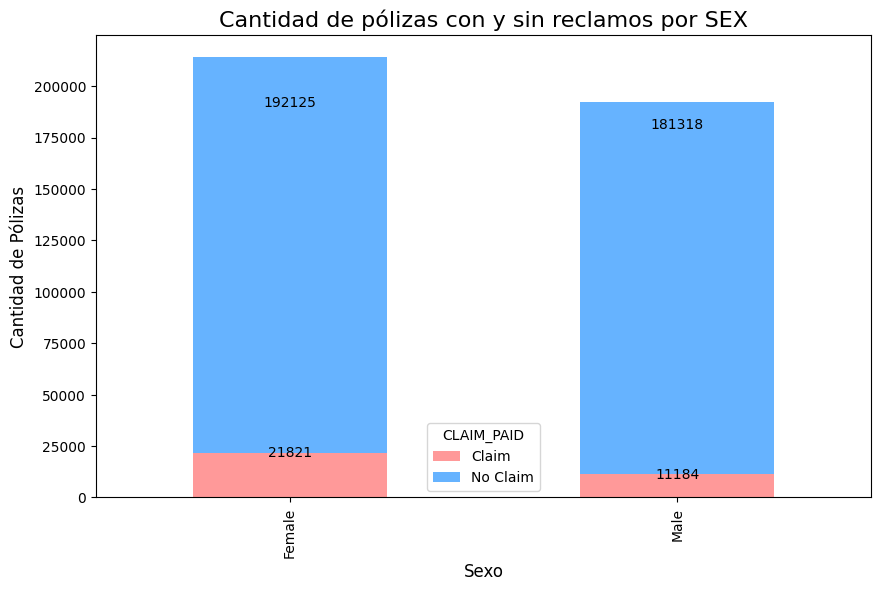

In [557]:
claim_counts_sex = merged_df.groupby(['SEX', merged_df['CLAIM_PAID'].apply(lambda x: 'Claim' if x > 0 else 'No Claim')]).size().unstack()

claim_counts_sex.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF9999', '#66B3FF'])

# Cantidad de pólizas por SEX y tipo de reclamo
print(claim_counts_sex)

plt.title('Cantidad de pólizas con y sin reclamos por SEX', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Cantidad de Pólizas', fontsize=12)

# Números dentro de las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() - 10), ha='center', va='center', fontsize=10, color='black')

plt.show()

Conclusiones principales:
- Las mujeres podrían tener mayor siniestralidad o ser más propensas a reclamar en caso de un incidente. Esto no implica que las mujeres sean conductoras más riesgosas, sino que podrían tener diferencias en el uso de la póliza.
- Si las mujeres tienen mayor siniestralidad real, la aseguradora podría ajustar su tarificación en base al perfil de riesgo.
- Si simplemente usan más la póliza sin necesariamente tener más accidentes, podrían ofrecerse programas de bonificación.

##### INSR_TYPE

CLAIM_PAID    Claim  No Claim
INSR_TYPE                    
1201         8695.0   91168.0
1202        24310.0  282205.0
1204            NaN      70.0


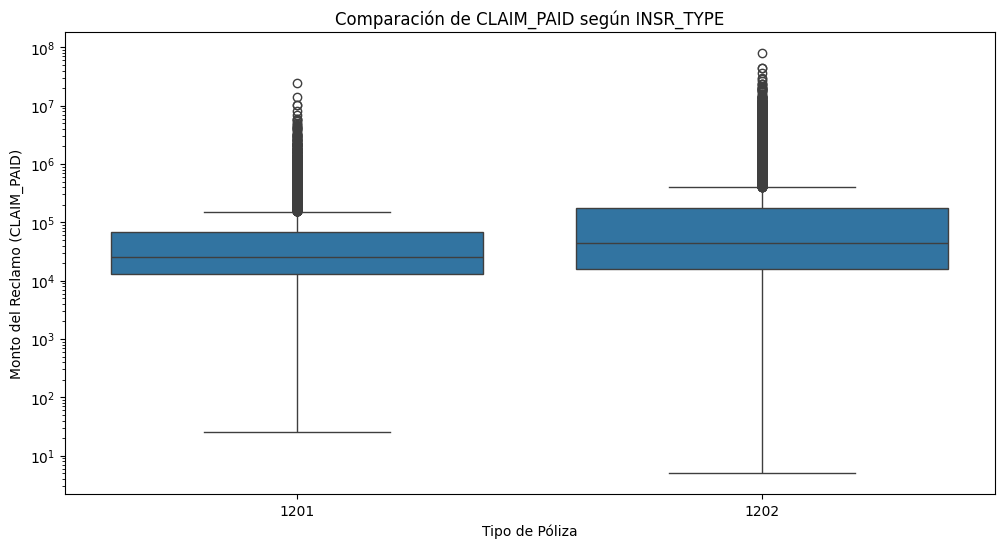

In [558]:
# Agrupar por INSR_TYPE y CLAIM_PAID
claim_counts_insr_type = merged_df.groupby(['INSR_TYPE', merged_df['CLAIM_PAID'].apply(lambda x: 'Claim' if x > 0 else 'No Claim')]).size().unstack()

# Imprimir la cantidad de pólizas por INSR_TYPE y tipo de reclamo
print(claim_counts_insr_type)

# Al tener CLAIM_PAID muchos valores igual a 0, el boxlot se verá distorsionado
filtered_df = merged_df[merged_df["CLAIM_PAID"] > 0]

# Crear un boxplot del valor de CLAIM_PAID por tipo de póliza (INSR_TYPE)
plt.figure(figsize=(12, 6))
sns.boxplot(x="INSR_TYPE", y="CLAIM_PAID", data=filtered_df)
plt.yscale("log")  # Escala logarítmica para mejor visualización
plt.title("Comparación de CLAIM_PAID según INSR_TYPE")
plt.xlabel("Tipo de Póliza")
plt.ylabel("Monto del Reclamo (CLAIM_PAID)")
plt.show()

Conclusiones principales:
- La póliza 1202 es la más costosa para la aseguradora, tanto en cantidad de reclamos como en monto total y promedio.
- Los montos promedio de reclamos en la póliza 1202 son casi 3 veces mayores que en la 1201, lo que sugiere que cubre incidentes más costosos.
- La póliza 1204 no ha registrado siniestros, lo que indica su baja siniestralidad o su baja adopción por parte de los clientes. Analizar los motivos por los cuáles no hay reclamos de esta póliza.

##### INSURED_VALUE

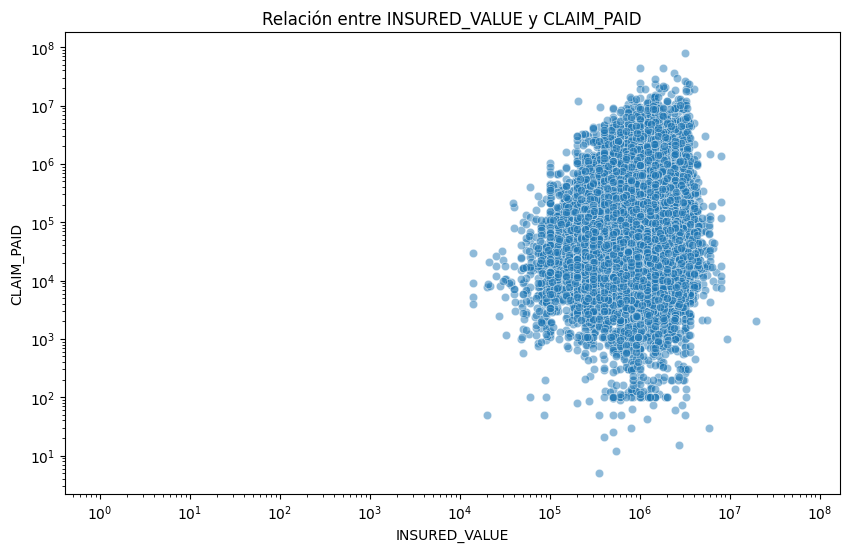

In [559]:
# Relación entre INSURED_VALUE y CLAIM_PAID
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['INSURED_VALUE'], y=merged_df['CLAIM_PAID'], alpha=0.5)

# Escala logarítmica para visualizar todo el rango de valores sin que los valores altos queden comprimidos.
plt.xscale('log')
plt.yscale('log')
plt.title('Relación entre INSURED_VALUE y CLAIM_PAID')
plt.show()

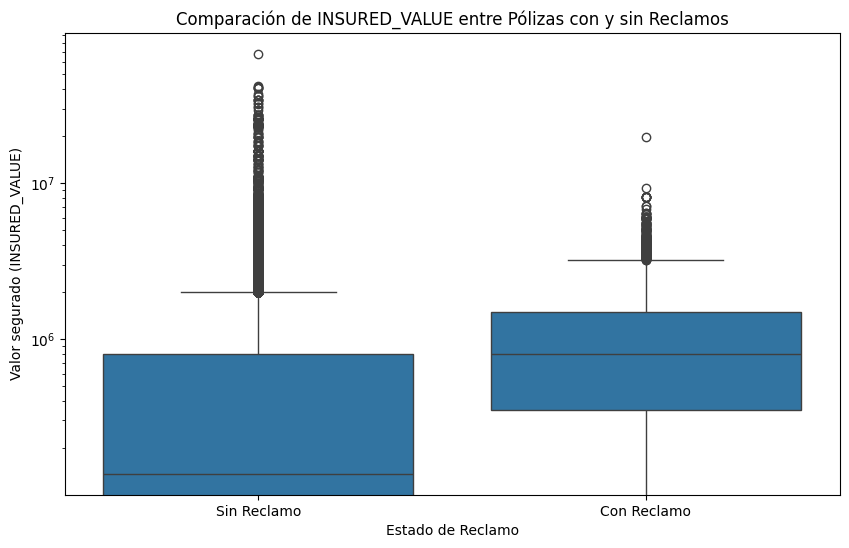

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df["CLAIM_PAID"] != 0, y=merged_df["INSURED_VALUE"])
plt.yscale("log")
plt.xticks([0, 1], ["Sin Reclamo", "Con Reclamo"])
plt.title("Comparación de INSURED_VALUE entre Pólizas con y sin Reclamos")
plt.xlabel("Estado de Reclamo")
plt.ylabel("Valor segurado (INSURED_VALUE)")
plt.show()

Conclusiones principales:
- Existe una correlación positiva entre INSURED_VALUE y CLAIM_PAID, lo que indica que los reclamos tienden a ser mayores para valores asegurados más altos. La relación no es completamente lineal, hay mucha variabilidad en los montos pagados incluso para valores asegurados similares.
Algunos valores asegurados altos tienen reclamos bajos, lo que sugiere que no todos los incidentes generan pérdidas proporcionales al valor del vehículo.

##### PREMIUM

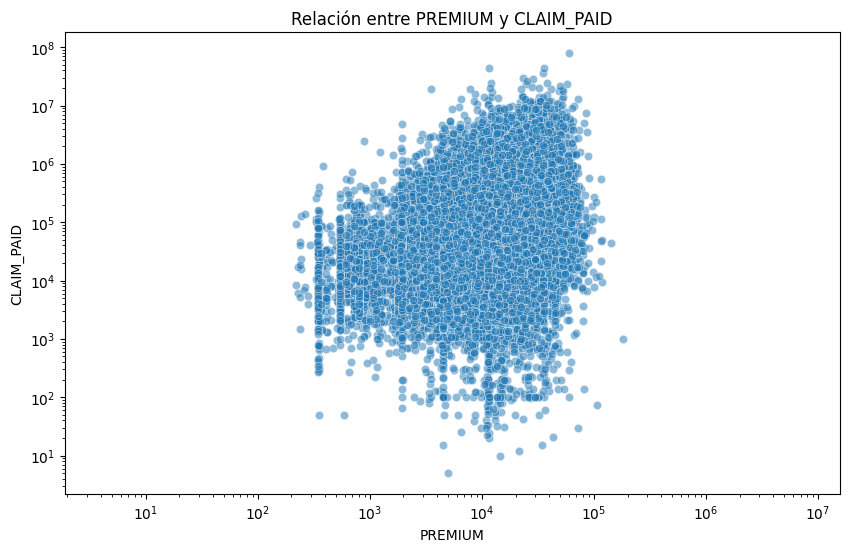

In [561]:
# Relación entre PREMIUM y CLAIM_PAID
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['PREMIUM'], y=merged_df['CLAIM_PAID'], alpha=0.5)

# Escala logarítmica para visualizar todo el rango de valores sin que los valores altos queden comprimidos.
plt.xscale('log')
plt.yscale('log')
plt.title('Relación entre PREMIUM y CLAIM_PAID')
plt.show()

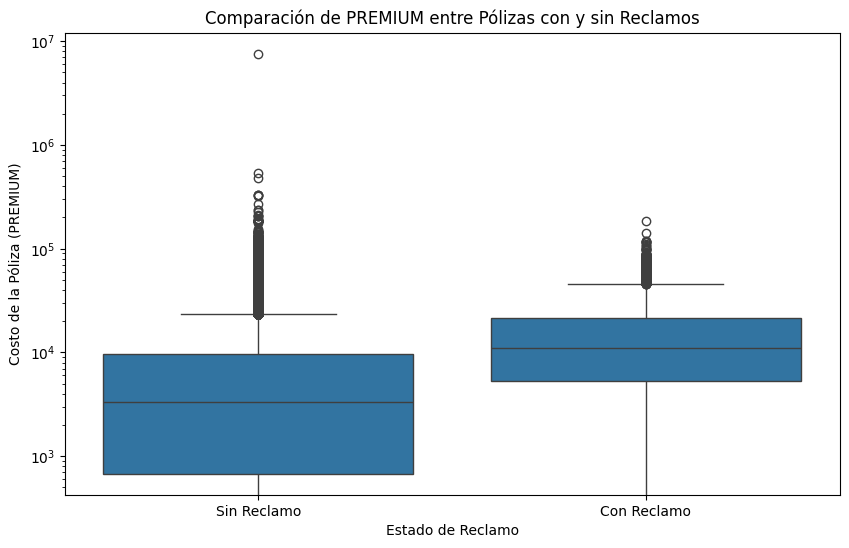

In [562]:
# Relación de PREMIUM entre pólizas con y sin reclamos
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df["CLAIM_PAID"] != 0, y=merged_df["PREMIUM"])
plt.yscale("log")
plt.xticks([0, 1], ["Sin Reclamo", "Con Reclamo"])
plt.title("Comparación de PREMIUM entre Pólizas con y sin Reclamos")
plt.xlabel("Estado de Reclamo")
plt.ylabel("Costo de la Póliza (PREMIUM)")
plt.show()

Conclusiones principales:
- Las pólizas con reclamos suelen tener primas más altas, pero la relación entre PREMIUM y CLAIM_PAID no es estrictamente proporcional.
- Por la correlación no todas las pólizas con primas altas generan reclamos altos, lo que sugiere que otros factores (como el tipo de vehículo o uso) pueden influir en la siniestralidad.
- Las pólizas sin reclamos presentan una mayor dispersión en los valores de PREMIUM, indicando que algunos clientes pagan más pero no necesariamente tienen incidentes.

##### USAGE

CLAIM_PAID              Claim  No Claim  Proporción de Reclamos (%)  \
USAGE                                                                 
Agricultural Any Farm      35      2050                        1.68   
Agricultural Own Farm      87      4619                        1.85   
Ambulance                 367      1392                       20.86   
Car Hires                  63      1126                        5.30   
Fare Paying Passengers   4224     59947                        6.58   
Fire fighting               1        30                        3.23   
General Cartage          5906     54753                        9.74   
Learnes                    44      1421                        3.00   
Others                     36      5084                        0.70   
Own Goods               10187    104510                        8.88   
Own service              2739     24249                       10.15   
Private                  8651     90266                        8.75   
Specia

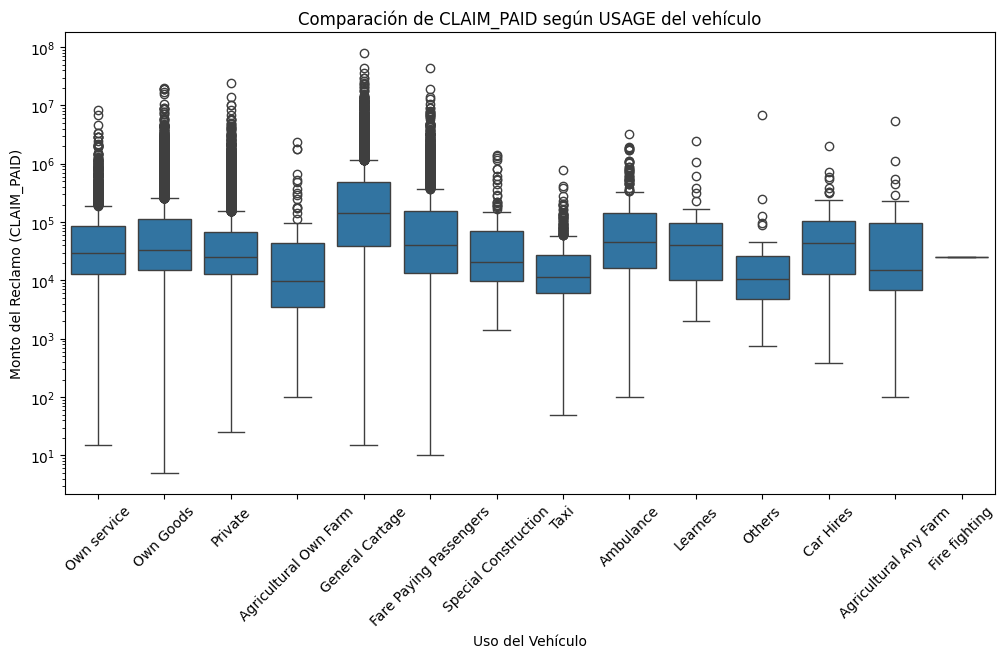

In [563]:
# Agrupar por USAGE y CLAIM_PAID
claim_counts_usage = merged_df.groupby(['USAGE', merged_df['CLAIM_PAID'].apply(lambda x: 'Claim' if x > 0 else 'No Claim')]).size().unstack().fillna(0)

# Calcular la proporción de reclamos dentro de cada USAGE
claim_counts_usage["Proporción de Reclamos (%)"] = (claim_counts_usage["Claim"] / (claim_counts_usage["Claim"] + claim_counts_usage["No Claim"])) * 100

# Calcular el porcentaje de participación de cada USAGE sobre el total de pólizas
total_policies = claim_counts_usage["Claim"].sum() + claim_counts_usage["No Claim"].sum()
claim_counts_usage["Porcentaje sobre Total (%)"] = ((claim_counts_usage["Claim"] + claim_counts_usage["No Claim"]) / total_policies) * 100

# Calcular la tasa de reclamos ajustada (ponderando el riesgo con la participación total)
claim_counts_usage["Tasa de Reclamos Ajustada"] = claim_counts_usage["Proporción de Reclamos (%)"] * (claim_counts_usage["Porcentaje sobre Total (%)"] / 100)

# Imprimir la cantidad de pólizas por USAGE y tipo de reclamo
print(claim_counts_usage.round(2))

filtered_df = merged_df[merged_df["CLAIM_PAID"] > 0]

# Comparar CLAIM_PAID según USAGE del vehículo
plt.figure(figsize=(12, 6))
sns.boxplot(x="USAGE", y="CLAIM_PAID", data=filtered_df)
plt.yscale("log")
plt.title("Comparación de CLAIM_PAID según USAGE del vehículo")
plt.xlabel("Uso del Vehículo")
plt.ylabel("Monto del Reclamo (CLAIM_PAID)")
plt.xticks(rotation=45)
plt.show()

Conclusiones principales:
- Private es la categoría más riesgosa debido a su gran volumen de pólizas y alta tasa de reclamos ajustada.
- El segmento de Fare Paying Passengers también es relevante, pero tiene un impacto menor en comparación con Private.
- Own Goods y General Cartage son segmentos que contribuyen significativamente a la siniestralidad.
- Categorías con una alta proporción de reclamos, como Ambulance, tienen menor impacto en la aseguradora porque representan un porcentaje pequeño del total asegurado.

##### PROD_YEAR

In [564]:
# Contar total de registros por año de producción
total_by_prod_year= merged_df["PROD_YEAR"].value_counts(ascending=False).sort_index()
print(total_by_prod_year)

PROD_YEAR
1950       17
1951        2
1953        7
1954        1
1955        1
        ...  
2014    41319
2015    35283
2016    17347
2017     3405
2018      113
Name: count, Length: 68, dtype: int64


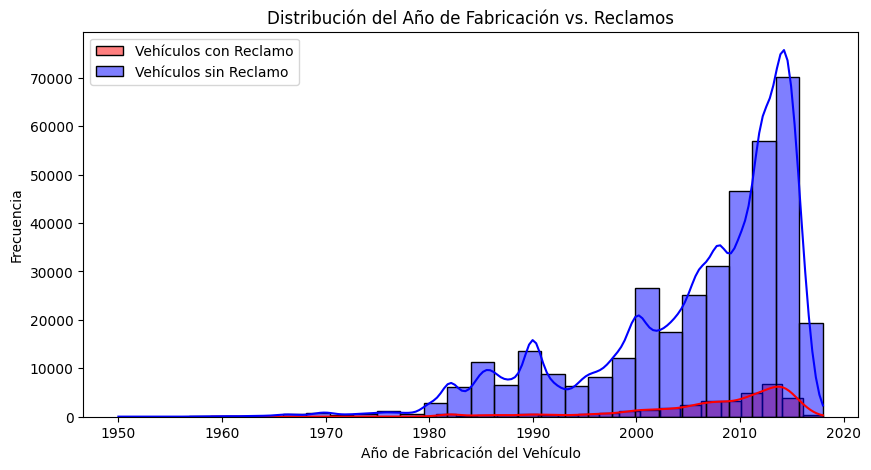

In [565]:
# Relación entre antigüedad del vehículo (PROD_YEAR) y siniestralidad
plt.figure(figsize=(10, 5))
sns.histplot(merged_df[merged_df["CLAIM_PAID"] != 0]["PROD_YEAR"], bins=30, kde=True, color="red", label="Vehículos con Reclamo")
sns.histplot(merged_df[merged_df["CLAIM_PAID"] == 0]["PROD_YEAR"], bins=30, kde=True, color="blue", label="Vehículos sin Reclamo")
plt.legend()
plt.title("Distribución del Año de Fabricación vs. Reclamos")
plt.xlabel("Año de Fabricación del Vehículo")
plt.ylabel("Frecuencia")
plt.show()

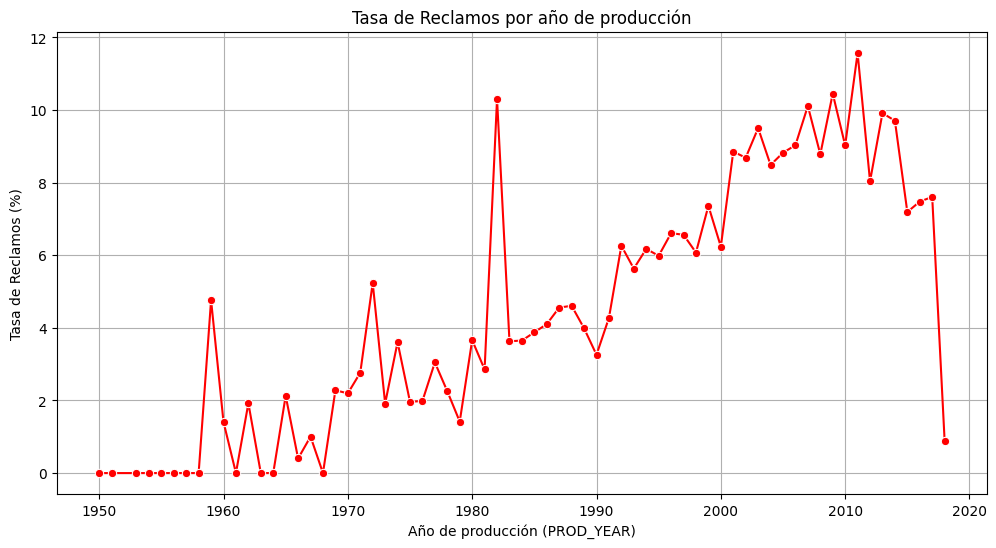

In [566]:
# Contar clientes con reclamos por cada año de producción
claims_by_prod_year = merged_df[merged_df["CLAIM_PAID"] != 0]["PROD_YEAR"].value_counts().sort_index()

# Calcular la tasa de reclamos dentro de cada año de producción
claim_rate_by_prod_year = (claims_by_prod_year / total_by_prod_year) * 100

claim_analysis = pd.DataFrame({
    "Total Clientes": total_by_prod_year,
    "Clientes con Reclamos": claims_by_prod_year,
    "Tasa de Reclamos (%)": claim_rate_by_prod_year
}).fillna(0)

plt.figure(figsize=(12, 6))
sns.lineplot(x=claim_analysis.index, y=claim_analysis["Tasa de Reclamos (%)"], marker="o", color="red")
plt.title("Tasa de Reclamos por año de producción")
plt.xlabel("Año de producción (PROD_YEAR)")
plt.ylabel("Tasa de Reclamos (%)")
plt.grid(True)
plt.show()

Conclusiones principales:
- Los vehículos más antiguos (pre-2015) tienen mayores tasas de reclamos.
- Los autos más nuevos tienen menos siniestros, lo que puede deberse a menor exposición al riesgo, mejor tecnología de seguridad y no poseer tanto desgaste.
- El aumento en la siniestralidad en autos de ciertos años podría estar relacionado con características específicas del vehículo o su uso.

##### TYPE_VEHICLE

C:\Users\solange.moreyra\AppData\Local\Temp\ipykernel_6896\2470031975.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehicle_claims.index, y=vehicle_claims.values, palette="viridis")


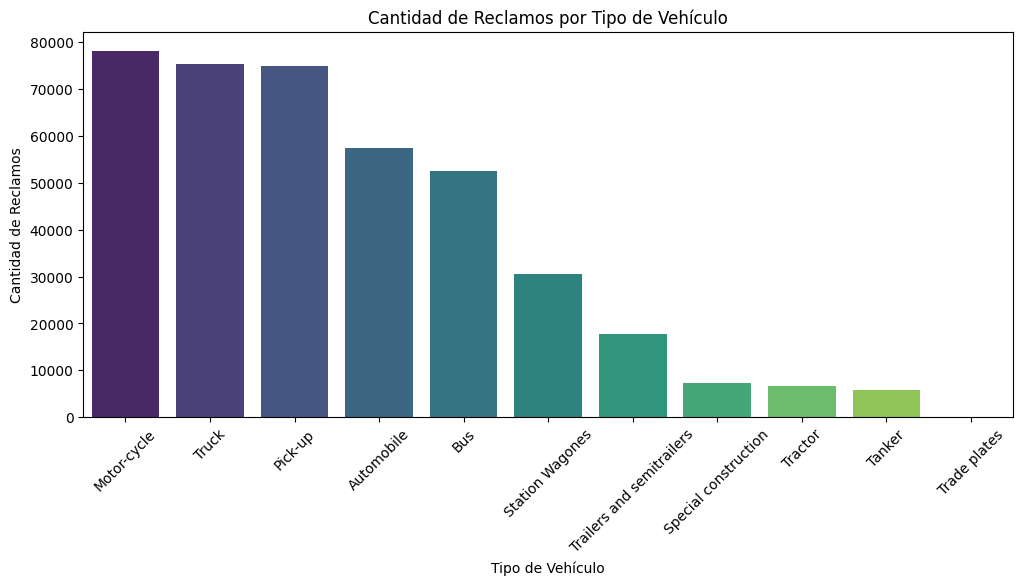

In [567]:
vehicle_claims = merged_df.groupby("TYPE_VEHICLE")["CLAIM_PAID"].count().sort_values(ascending=False)

# Gráfico de proporción de reclamos por TYPE_VEHICLE
plt.figure(figsize=(12, 5))
sns.barplot(x=vehicle_claims.index, y=vehicle_claims.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Cantidad de Reclamos por Tipo de Vehículo")
plt.xlabel("Tipo de Vehículo")
plt.ylabel("Cantidad de Reclamos")
plt.show()

Conclusiones principales:
- Al igual que USAGE, es importante ver la proporión total. 
- Algunos tipos de vehículos tienen una frecuencia de reclamos más alta. Esto podría indicar diferencias en el riesgo debido al uso que le pueden dar los consumidores.

##### MAKE

C:\Users\solange.moreyra\AppData\Local\Temp\ipykernel_6896\2547559878.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=make_claims.index, y=make_claims.values, palette="magma")


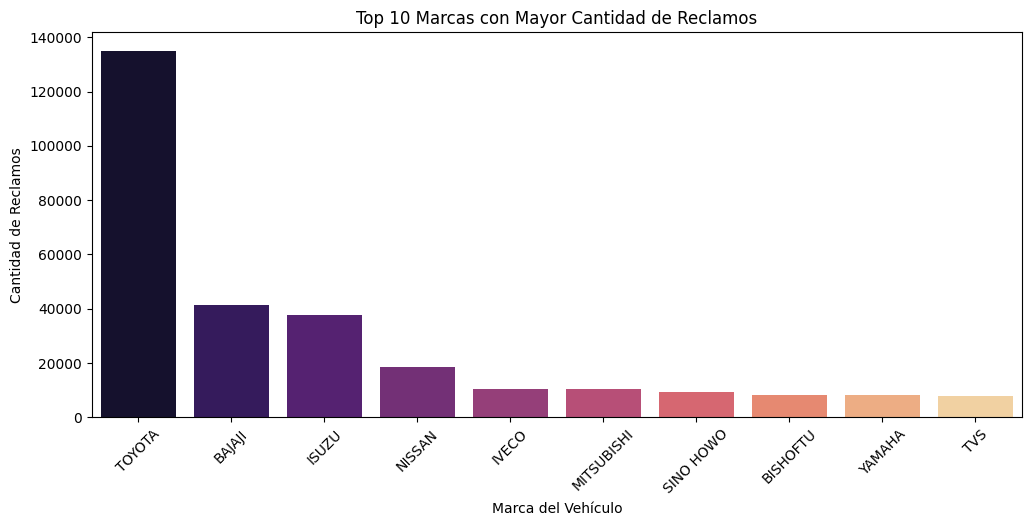

In [568]:
# Evaluar si ciertas marcas (MAKE) tienen mayor siniestralidad
make_claims = merged_df.groupby("MAKE")["CLAIM_PAID"].count().sort_values(ascending=False).head(10)

# Gráfico de las 10 marcas con más reclamos
plt.figure(figsize=(12, 5))
sns.barplot(x=make_claims.index, y=make_claims.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Top 10 Marcas con Mayor Cantidad de Reclamos")
plt.xlabel("Marca del Vehículo")
plt.ylabel("Cantidad de Reclamos")
plt.show()

Cabe destacar que se observan marcas de autos que no existen por lo mencionado anteriormente.

Conclusiones principales:
- Al igual que USAGE, es improtante ver la proporión total. 
- Algunas marcas tienen significativamente más reclamos. Esto podría indicar diferencias en la calidad del vehículo, el perfil de los conductores o la forma en que son utilizados.

##### CCM_TON y CARRYING_CAPACITY

Estas dos variables se puede analziar si se bsuca por ejemplo:
- Si vehículos con motores grandes presentan reclamos más altos
- Si vehículos con mayor capacidad de carga podrían estar expuestos a más riesgos (mayor peso, más kilómetros recorridos, entre otros)

##### INSURED_VALUE y PREMIUM

Existe una relación positiva fuerte entre ambas variables, a medida que aumenta el valor asegurado también aumenta el costo de la prima. Un INSURED_VALUE más alto generalmente conlleva a una prima más alta, pero la relación no es exactamente proporcional. Se puede hacer un análisis de regresión para cuantificar cómo INSURED_VALUE afecta a PREMIUM. 

### KMeans

Puede ser útil para conocer la cartera de clientes porque:
- Podemos ver qué clientes se comportan de manera similar.
- Identificar clientes de alto (si un cluster tiene muchos reclamos) y bajo riesgo (este tiene baja siniestralidad y se puede incentivar su fidelización).
Diseño de estrategias comerciales perosnalziadas.
- Priorización en la gestión de riesgos y prevención de fraudes. 

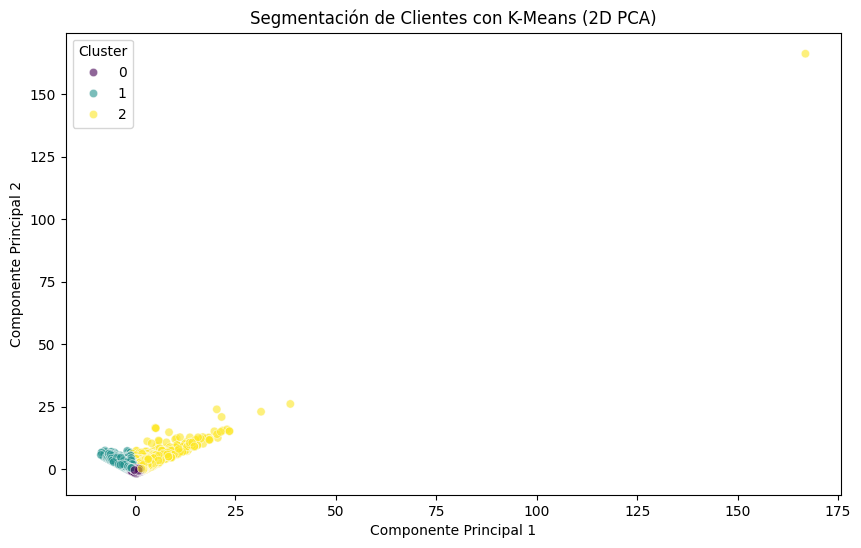

,CUSTOMER_SENIORITY,INSURED_VALUE,PREMIUM,PROD_YEAR,CCM_TON,CARRYING_CAPACITY,CLAIM_PAID,PCA1,PCA2
Cluster,,,,,,,,,
0,2.343966,3.845465e+05,5402.659245,2010.091815,2015.523524,59.025523,8856.064055,0.087139,-0.706030
1,14.171396,1.509306e+05,3921.944405,1990.664026,3635.621999,325.922305,6685.055714,-2.074492,1.199067
2,2.212817,1.769963e+06,24483.985292,2010.853286,8563.191101,1935.693023,86124.417718,1.684323,1.214826


In [ ]:
# Código ejemplo

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Variables relevantes para el clustering
features = ["CUSTOMER_SENIORITY", "INSURED_VALUE", "PREMIUM", "PROD_YEAR", "CCM_TON", "CARRYING_CAPACITY", "CLAIM_PAID"]

# Filtrar el dataset eliminando valores nulos
df_cluster = merged_df[features].dropna()

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster["Cluster"] = kmeans.fit_predict(scaled_data)

# Reducir la dimensionalidad con PCA para visualización
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df_cluster["PCA1"] = pca_data[:, 0]
df_cluster["PCA2"] = pca_data[:, 1]

# Visualizar los clusters en 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df_cluster, palette="viridis", alpha=0.6)
plt.title("Segmentación de Clientes con K-Means (2D PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()

# Mostrar resumen de clusters
df_cluster.groupby("Cluster").mean()